# Predicting AirBnB Prices with Regression Models

## Problem
For this assignment I will be constructing regression models for the prediction of AirBnB property rental prices based on attributes such as number of rooms, number of guests accommodated and location. Such a model has potential real-world applications, for example suggesting rental prices to hosts when they register their property with AirBnB.

## AirBnB Bristol Dataset
The provided dataset is based on the AirBnB Bristol Dataset, which contains data about AirBnB properties for rental in Bristol. This data includes the locations of the properties (as latitude, longitude and the name of the neighbourhood), number of bedrooms and bathrooms, number of guests accommodated, and data about previous guest reviews.

### Dataset Preparation & Examination
Firstly the unmodified data is loaded and examined using `pandas`.

In [1]:
%matplotlib inline

import os
import pandas as pd


DATA_PATH = '../data/'


def load_airbnb_data(path=DATA_PATH):
    csv_path = os.path.join(path, 'BristolAirbnbListings.csv')
    return pd.read_csv(csv_path, index_col=0)


data = load_airbnb_data()
data.head()

,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,accommodates,...,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,,,,,,,
70820,City View - Sarah's double room.,360195,Sarah,Windmill Hill,BS3 4,51.439942,-2.591726,Townhouse,Private room,2,...,2.10,96,10,9,10,10.0,10.0,10.0,5,44
117122,City Centre - Waterside Retreat,591555,Marcus,Clifton,BS8 4UJ,51.450512,-2.610536,Apartment,Private room,4,...,1.40,99,10,10,10,10.0,10.0,10.0,1,360
146407,Sunny Central Artist Cottage (Dbl),708175,Orla,Southville,BS3,51.441308,-2.602706,Townhouse,Private room,3,...,0.76,91,9,8,9,10.0,9.0,9.0,2,46
176306,The White Room - Central Bristol Art House Ga...,708175,Orla,Bedminster,NaN,51.441006,-2.601208,Townhouse,Private room,2,...,0.41,95,9,9,10,10.0,9.0,9.0,2,57
220956,"Light, Modern, 1st Floor Apartment.",1145941,Stephen,Bedminster,England,51.438517,-2.601421,Apartment,Entire home/apt,2,...,0.85,94,10,9,10,10.0,9.0,9.0,1,253


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 70820 to 30099927
Data columns (total 27 columns):
name                              2375 non-null object
host_id                           2375 non-null int64
host_name                         2375 non-null object
neighbourhood                     2375 non-null object
postcode                          2326 non-null object
latitude                          2375 non-null float64
longitude                         2375 non-null float64
property_type                     2375 non-null object
room_type                         2375 non-null object
accommodates                      2375 non-null object
bathrooms                         2372 non-null object
bedrooms                          2372 non-null object
beds                              2372 non-null object
price                             2375 non-null int64
minimum_nights                    2375 non-null int64
number_of_reviews                 2375 non-null int64
last_re

Clearly some of the above attributes are not the correct datatypes. These datatypes are now manually set, as incorrect datatypes cause issues for visualisation.

In [3]:
# force these columns to relevant dtypes
int_cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
            'review_scores_communication', 'review_scores_location' , 'reviews_per_month', 'number_of_reviews', 
            'minimum_nights', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_value', 
            'calculated_host_listings_count','availability_365', 'price']

categorical_cols = ['host_name', 'host_id', 'neighbourhood', 'postcode', 'property_type', 'room_type']

data[int_cols] = data[int_cols].apply(pd.to_numeric, errors="coerce")
data[int_cols] = data[int_cols].fillna(0.0).astype(int)
data[categorical_cols] = data[categorical_cols].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 70820 to 30099927
Data columns (total 27 columns):
name                              2375 non-null object
host_id                           2375 non-null category
host_name                         2375 non-null category
neighbourhood                     2375 non-null category
postcode                          2326 non-null category
latitude                          2375 non-null float64
longitude                         2375 non-null float64
property_type                     2375 non-null category
room_type                         2375 non-null category
accommodates                      2375 non-null int64
bathrooms                         2375 non-null int64
bedrooms                          2375 non-null int64
beds                              2375 non-null int64
price                             2375 non-null int64
minimum_nights                    2375 non-null int64
number_of_reviews                 2375 non-null int6

Some properties (mean, min, max etc.) of each attribute are now computed to gain further insight into the data. 

In [4]:
data.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.00000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,51.461004,-2.590871,3.088000,1.197053,1.432000,1.806737,76.600842,2.825263,31.608842,1.530947,80.64800,8.944000,8.267368,8.412632,8.433263,8.187368,8.118316,6.943579,121.521263
std,0.016149,0.025749,2.163554,0.610143,0.983171,1.540289,129.165841,13.122816,51.215247,2.121765,34.50375,7.935013,4.164641,3.483480,3.477280,3.404345,3.401134,16.766377,128.369568
min,51.404299,-2.701418,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,51.452411,-2.607064,2.000000,1.000000,1.000000,1.000000,35.000000,1.000000,2.000000,0.000000,88.50000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,1.000000,0.000000
50%,51.460520,-2.592629,2.000000,1.000000,1.000000,1.000000,59.000000,2.000000,11.000000,1.000000,96.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,71.000000
75%,51.469853,-2.578521,4.000000,1.000000,2.000000,2.000000,85.000000,2.000000,38.000000,2.000000,99.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,225.500000
max,51.512555,-2.514635,16.000000,12.000000,13.000000,24.000000,5000.000000,365.000000,477.000000,18.000000,100.00000,100.000000,99.000000,10.000000,10.000000,10.000000,10.000000,78.000000,365.000000


Some issues with the data can already be seen. The minimum `price` in the dataset is 0, which is not valid. Additionally the maximum `price` is much higher than the mean, which could suggest the datapoint with `price` 5000 (and other very highly priced datapoints) is an outlier.

In [5]:
# drop rows where price is 0 or lower
data = data[data.price > 0]

The data is then visualised with histograms for each attibute. This is useful to examine the spread of attribute values across the dataset.

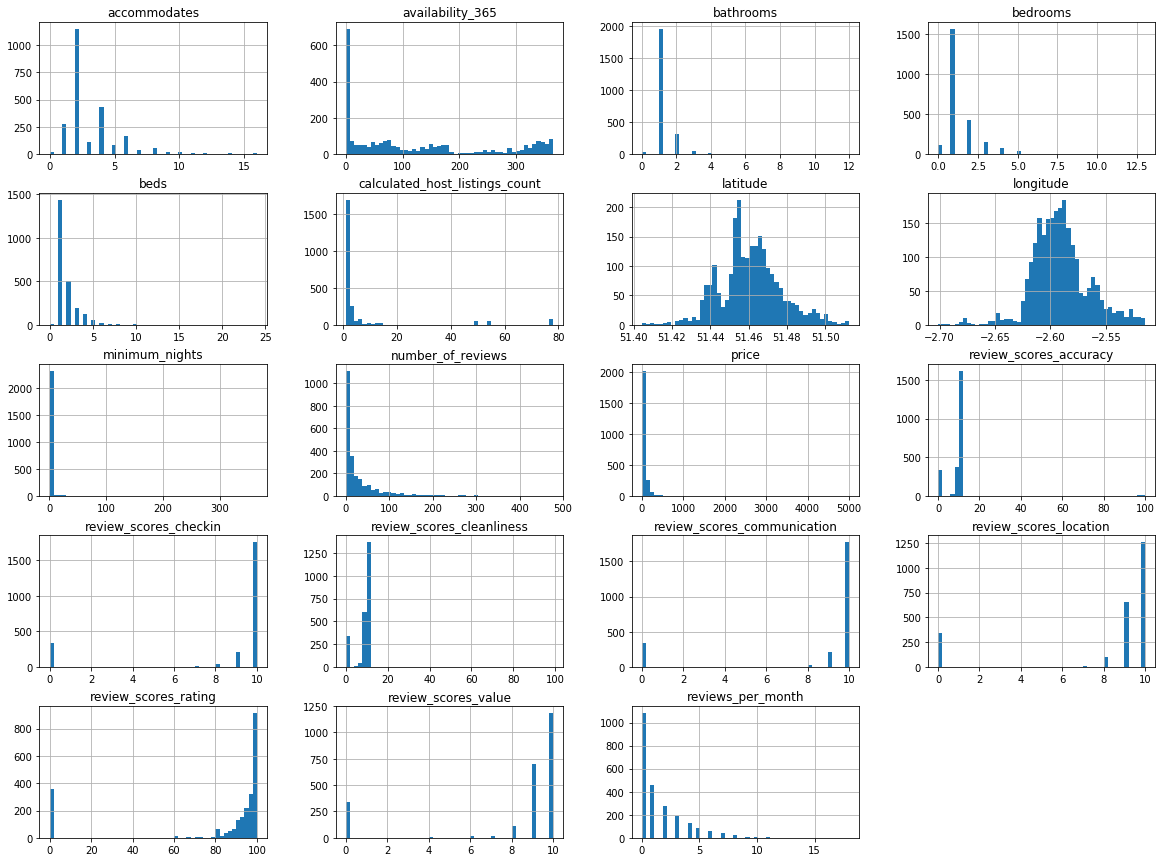

In [6]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

These graphs support the notion that high prices are outliers which could hamper learning. Datapoints with `price` > 650 are dropped for this reason.

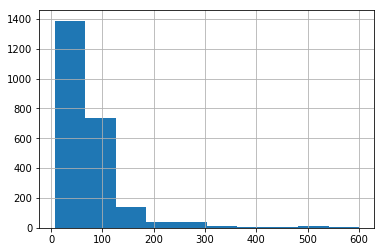

In [7]:
# drop rows where price is above 650
data = data[data.price <= 650]
data['price'].hist()
plt.show()

#### Train/Test Split

At this point the data is split into train and test sets at a ratio of 8:2. Splitting the sets before any further analysis helps to prevent data snooping bias.

In [8]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.2, random_state=10)

#### Identifying Correlations

The attribute we hope to predict is `price`, and intuitively one would expect that the price varies by location. Using the latitude and longitude, the geographical locations of each datapoint can be plotted. The color of each datapoint is used to represent the price attribute, which will help to identify geographically-linked variations in price.

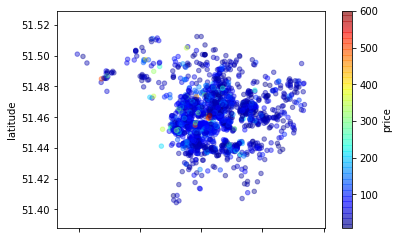

In [9]:
data_train.plot(kind="scatter", x="longitude", y="latitude", alpha=.4,
c="price", cmap=plt.get_cmap("jet"), colorbar=True,
)


The relationship between location and `price` is less obvious than expected, however most of the expensive properties appear to be located centrally.

In order to further examine which features correlate with `price`, a correlation matrix is used. This computes the standard correlation coefficient for each pair of numerical attributes.

In [10]:
corr = data_train.corr()
corr['price'].sort_values(ascending=False)

price                             1.000000
accommodates                      0.644340
beds                              0.617145
bedrooms                          0.596364
bathrooms                         0.425260
availability_365                  0.131786
calculated_host_listings_count    0.031430
latitude                         -0.013961
minimum_nights                   -0.017784
reviews_per_month                -0.100021
number_of_reviews                -0.103425
review_scores_accuracy           -0.106691
review_scores_cleanliness        -0.135704
review_scores_location           -0.157574
review_scores_rating             -0.162269
longitude                        -0.166688
review_scores_checkin            -0.172684
review_scores_communication      -0.173819
review_scores_value              -0.192292
Name: price, dtype: float64

The `beds` and `accommodates` features correlate strongly with `price`, which is to be expected. They also have very similar correlation coefficients to one another, suggesting that only one of them need be considered. `latitude` and `longitude` have small negative correlations, confirming the earlier suspicion that they have less influence on `price` than expected (individually). `review_scores_value` has the strongest negative correlation with `price`, which is also unsurprising as one would generally expect guests to review cheaper properties as better value.

In order to visualise some of these relationships, graps of each pair of a selection of the attributes are plotted.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20e8b65668>,
      dtype=object)

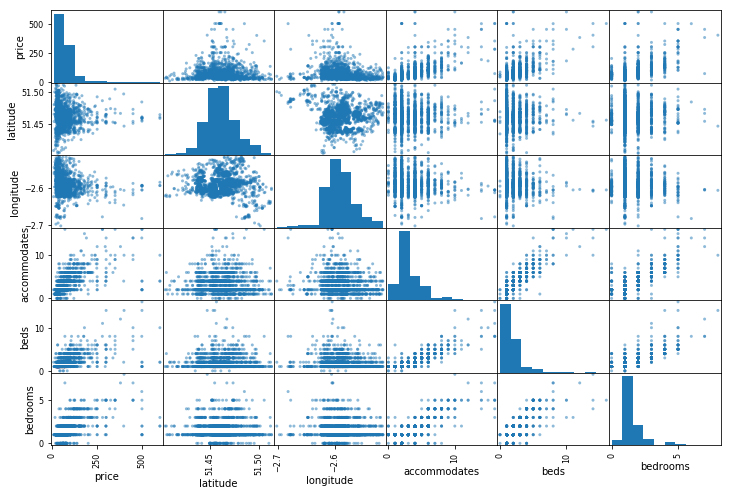

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_train[['price', 'latitude', 'longitude', 'accommodates', 'beds', 'bedrooms']], figsize=(12, 8))


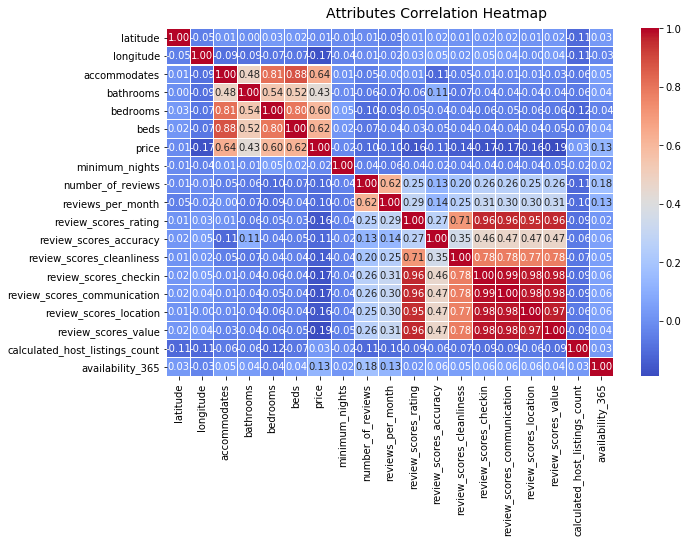

In [12]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 6))

hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

### Data Cleaning

The data contains missing values for some attributes. Datapoints that contain missing values are dropped to ensure that the data is accurate.

In [13]:
# disable chained assignment warning
pd.options.mode.chained_assignment = None  # default='warn'

# drop rows with missing data
data_train.dropna(inplace= True)
data_test.dropna(inplace= True)

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 14460162 to 21108060
Data columns (total 27 columns):
name                              1608 non-null object
host_id                           1608 non-null category
host_name                         1608 non-null category
neighbourhood                     1608 non-null category
postcode                          1608 non-null category
latitude                          1608 non-null float64
longitude                         1608 non-null float64
property_type                     1608 non-null category
room_type                         1608 non-null category
accommodates                      1608 non-null int64
bathrooms                         1608 non-null int64
bedrooms                          1608 non-null int64
beds                              1608 non-null int64
price                             1608 non-null int64
minimum_nights                    1608 non-null int64
number_of_reviews                 1608 non-null i

The dataset is now clean, with 1608 training datapoints remaining.

## Model 1: Linear Regression

The first model to be considered is a simple Linear Regression model. Note that only the training set is being used to establish model performance, with and without 10-fold cross validation. The best model will then be evaluated on the test set. 

### Univariate
#### `accommodates`

Inititally linear regression is performed using only the `accommodates` feature as a predictor. This helps to establish baseline performance, and also to establish which features are most useful.

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# K-fold cross validation folds
K = 10

def display_scores(scores):
    print("\nRMSE on training set (", K, "-fold cross validation)")
    print("----------------------------")
    print("Values:", scores)
    print("\nMean:", scores.mean())
    print("\nStandard deviation:", scores.std())

# use only 'accommodates' as a feature
x_train = data_train['accommodates'].values.reshape(-1, 1)
y_train = data_train['price'].values.reshape(-1, 1)

# scale feature data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

regr = LinearRegression()

# evaluate on training set
print("RMSE on training set")
print("---------------------")
regr.fit(x_train, y_train)
y_preds = regr.predict(x_train)
mse = mean_squared_error(y_train, y_preds)
print("Value:", np.sqrt(mse))

# evaluate (K-fold cross validation) on train set
scores = cross_val_score(regr, x_train, y_train, scoring="neg_mean_squared_error", cv=K)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

RMSE on training set
---------------------
Value: 36.53770440330808

RMSE on training set ( 10 -fold cross validation)
----------------------------
Values: [38.01810128 42.27333715 29.30905326 31.11990294 27.68116441 39.2305868
 49.29196378 38.41349751 29.73609937 36.33437545]

Mean: 36.14080819522577

Standard deviation: 6.42886136133281


/home/mloaf/cs985/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/mloaf/cs985/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The model performs similarly with and without cross validation, which demonstrates that the model is not overfitting. As the RMSE is significant this suggests that the model is actually underfitting. This model will be trained again with some of the other highly correlated features (based on the correlation coefficients calculated earlier) to establish the effect of feature selection on the error. 

### Multivariate
#### `accommodates`, `beds`, `bathrooms`, `availability_365`

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# use some of the highly correlated numerical attributes as features
x_train = data_train.drop(data_train.columns.difference(['accommodates', 'beds', 'bathrooms', 'availability_365']), axis=1)
y_train = data_train['price'].values.reshape(-1, 1)

# scale feature data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

regr = LinearRegression()

# evaluate on training set
print("RMSE on training set")
print("---------------------")
regr.fit(x_train, y_train)
y_preds = regr.predict(x_train)
mse = mean_squared_error(y_train, y_preds)
print("Value:", np.sqrt(mse))

# evaluate (K-fold cross validation) on train set
scores = cross_val_score(regr, x_train, y_train, scoring="neg_mean_squared_error", cv=K)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

RMSE on training set
---------------------
Value: 35.54667847916111

RMSE on training set ( 10 -fold cross validation)
----------------------------
Values: [37.98743641 40.7007573  29.15794276 28.74846905 27.66108479 40.03228739
 46.88313584 38.64890519 29.83818048 34.38472657]

Mean: 35.40429257664165

Standard deviation: 6.113347025530753


/home/mloaf/cs985/lib/python3.5/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mloaf/cs985/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Taking the other features into account has improved the performance slightly, but has not made a significant change. Next, all of the numerical features will be used as predictors to attempt to further reduce the mean RMSE.

#### All Numerical Features

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# use all numerical attributes as features
x_train = data_train.drop('price', axis=1).drop(data_train.select_dtypes(['object', 'category']), axis=1)
# scale feature data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

regr = LinearRegression()

# evaluate on training set
print("RMSE on training set")
print("---------------------")
regr.fit(x_train, y_train)
y_preds = regr.predict(x_train)
mse = mean_squared_error(y_train, y_preds)
print("Value:", np.sqrt(mse))

# evaluate (K-fold cross validation) on train set
scores = cross_val_score(regr, x_train, y_train, scoring="neg_mean_squared_error", cv=K)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

RMSE on training set
---------------------
Value: 33.71778396701331

RMSE on training set ( 10 -fold cross validation)
----------------------------
Values: [37.66910118 37.30363591 28.71487232 28.44143055 25.65289141 39.25166614
 46.29748256 36.16369606 27.53392636 33.10812623]

Mean: 34.0136828722984

Standard deviation: 6.156087512758052


/home/mloaf/cs985/lib/python3.5/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mloaf/cs985/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


With the additional data the model performs slightly better, which suggests that the additional features are in fact useful predictors for the `price`. The RMSE and the cross validated RMSE mean are still very similar, meaning the model is still likely underfitting. This suggests the Linear Regression model has insufficient capacity to fit the data properly.

## Model 2: Decision Tree Regression

The next model is the Decision Tree. This model was chosen as it is higher capacity than a Linear Regresson model, and can therefore model fit more complex data. It is also a "white box" model, meaning the results are easier to interpret. 

In [17]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

# use all numerical attributes as features
x_train = data_train.drop('price', axis=1).drop(data_train.select_dtypes(['object', 'category']), axis=1)
y_train = data_train['price'].values.reshape(-1, 1)

tree_regr = DecisionTreeRegressor(max_depth=3)

# evaluate on training set
print("RMSE on training set")
print("---------------------")
tree_regr.fit(x_train, y_train)
y_preds = tree_regr.predict(x_train)
mse = mean_squared_error(y_train, y_preds)
print("Value:", np.sqrt(mse))

# evaluate (K-fold cross validation) on train set
scores = cross_val_score(tree_regr, x_train, y_train, scoring="neg_mean_squared_error", cv=K)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

RMSE on training set
---------------------
Value: 33.489775803078324

RMSE on training set ( 10 -fold cross validation)
----------------------------
Values: [38.62646803 38.08801565 30.89711819 30.49954181 26.16668014 37.52948437
 53.69180954 35.09787454 33.84775819 37.20174183]

Mean: 36.164649228527566

Standard deviation: 6.972842162909533


This model performs better than the Linear model, however the difference between the cross validated and non-cross validated error suggests overfitting is taking place. The next model is a Random Forest Regressor, an ensemble method based on Decision Trees.

## Model 3: Random Forest Regression

In [18]:
from sklearn.ensemble import RandomForestRegressor
    
forest_regr = RandomForestRegressor(n_estimators=100, max_depth=None)
forest_regr.fit(x_train, y_train)

# use all numerical attributes as features
x_train = data_train.drop('price', axis=1).drop(data_train.select_dtypes(['object', 'category']), axis=1)
y_train = data_train['price'].values.reshape(-1, 1)

# evaluate on training set
print("RMSE on training set")
print("---------------------")
forest_regr.fit(x_train, y_train)
y_preds = forest_regr.predict(x_train)
mse = mean_squared_error(y_train, y_preds)
print("Value:", np.sqrt(mse))

# evaluate (K-fold cross validation) on train set
scores = cross_val_score(forest_regr, x_train, y_train, scoring="neg_mean_squared_error", cv=K)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

/home/mloaf/cs985/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RMSE on training set
---------------------


/home/mloaf/cs985/lib/python3.5/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Value: 12.762726094498154


/home/mloaf/cs985/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mloaf/cs985/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mloaf/cs985/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mloaf/cs985/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column


RMSE on training set ( 10 -fold cross validation)
----------------------------
Values: [36.72020642 35.36591353 28.13758824 27.69918997 23.23657684 37.38057384
 42.90089719 32.51751344 35.46828152 31.48787112]

Mean: 33.09146120952438

Standard deviation: 5.406004356849557


The Random Forest produces a vastly improved error of around only 12 on the training set. Unfortunately it is clearly overfitting the training data as the cross validated mean RMSE remains around 33. As this is the best performing model, we will now evaluate it against the test set.

In [19]:
# use all numerical attributes as features
x_test = data_test.drop('price', axis=1).drop(data_train.select_dtypes(['object', 'category']), axis=1)
y_test = data_test['price'].values.reshape(-1, 1)

# evaluate on test set
print("RMSE on test set")
print("---------------------")
y_preds = forest_regr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
print("Value:", np.sqrt(mse))

RMSE on test set
---------------------
Value: 35.79941969484708


This produces a reasonable RMSE value on the test set. It is clear that the model has overfit the training data as the RMSE on the test set is significantly higher than it was on the train set, however it still compares favourably to the other models.

## Evaluation

With this dataset and choice of features it appears that error values lower than 34 are difficult to acheive. Several of the predicted prices are significantly incorrect but many of them are close or equal to the actual values, as can be seen in the sampling below.

In [21]:
print("predicted prices:", y_preds[:18].flatten().astype(int))
print("   actual prices:", y_test[:18].flatten().astype(int))

predicted prices: [ 32  46  61  46  34 133  23  44  50  76  33  38  69 129  69  41  36  35]
   actual prices: [ 27  75  60  50  25 242  25  35  45  99  33  32  69 149  69  50  25  27]


In conclusion, this model can predict `price` with reasonable accuracy in the general case. Further improvement may be found by employing different model types (e.g. SVM), and experimenting with different features. 